# Проект 5. 
# Новая система рекомендаций товаров в приложении по доставке продуктов

Команда приложения по доставке продуктов внедрила  умную систему рекомендации товаров – предполагается, что такая система поможет пользователям эффективнее работать с приложением и лучше находить необходимые товары.

<div class="alert alert-block alert-danger">
<b>Задачи:</b><br>
    1. Сформировать гипотезы<br>
    2. Доказать или опровергнуть гипотезы<br>
    3. Принять решение, использовать ли дальше новую систему рекомендации товаров<br>
</div>

In [51]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pingouin as pg

In [52]:
# История заказов пользователей, информация о том, какие заказы создавали и отменяли пользователи
orders = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/prdO8FDQx7lzCg')
orders.head()

,order_id,creation_time,product_ids
0,1255,2022-08-26 00:00:19.000000,"{75, 22, 53, 84}"
1,1256,2022-08-26 00:02:21.000000,"{56, 76, 39}"
2,1257,2022-08-26 00:02:27.000000,"{76, 34, 41, 38}"
3,1258,2022-08-26 00:02:56.000000,"{74, 6}"
4,1259,2022-08-26 00:03:37.000000,"{20, 45, 67, 26}"


In [53]:
# Подробная информация о продуктах, их название и стоимость
products = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/atwrlmB_wu-fHA')
products.head()

,product_id,name,price
0,1,сахар,150.0
1,2,чай зеленый в пакетиках,50.0
2,3,вода негазированная,80.4
3,4,леденцы,45.5
4,5,кофе 3 в 1,15.0


In [54]:
# Какой тип данных в данной таблице
products.dtypes

product_id      int64
name           object
price         float64
dtype: object

In [55]:
# История заказов пользователей, информация о том, какие заказы создавали и отменяли пользователи
# Пользователи в группе 0 пользовались старой версией приложения без рекомендации товаров
# Все пользователи в группе 1 пользовались приложением с новой системой рекомендации товаров
users = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/4qY27tJ23G_B1g')
users.head()

,user_id,order_id,action,time,date,group
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0
3,966,1258,create_order,2022-08-26 00:02:56.000000,2022-08-26,0
4,967,1259,create_order,2022-08-26 00:03:37.000000,2022-08-26,1


In [56]:
#  Проверка статусов заказов, имеющихся в таблице
users.action.value_counts()

create_order    4123
cancel_order     214
Name: action, dtype: int64

In [57]:
#  Общее количество заказов в таблице столько же, сколько и сформированных заказов
users.shape

(4337, 6)

<div class="alert alert-block alert-danger">
Нулевая гипотеза - количество продаж на пользователя не изменилось<br>
1 гипотеза - количество заказов на пользователя изменилось
</div>

In [58]:
# Количество заказов в каждой группе
users.groupby('group', as_index = False).size()

,group,size
0,0,1691
1,1,2646


In [59]:
# Количество заказов в 1 группе больше, чем в 0
#  Отбираю заказы, которые были отменены
cans_orders = users.query("action == 'cancel_order'").order_id
cans_orders

8        1258
39       1296
47       1298
54       1308
60       1315
        ...  
4221    54938
4255    56612
4259    56772
4307    58492
4321    59055
Name: order_id, Length: 214, dtype: int64

In [60]:
#  Отмечаю в таблице, какие заказы были отменены
users['is_canceled'] = users['order_id'].isin(cans_orders).astype(int)
users.head()

,user_id,order_id,action,time,date,group,is_canceled
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,0
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1,0
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0,0
3,966,1258,create_order,2022-08-26 00:02:56.000000,2022-08-26,0,1
4,967,1259,create_order,2022-08-26 00:03:37.000000,2022-08-26,1,0


In [61]:
#  Убираю из таблицы все заказы, которые были отменены
active_ords = users.query("is_canceled == 0")
active_ords.head()

,user_id,order_id,action,time,date,group,is_canceled
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,0
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1,0
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0,0
4,967,1259,create_order,2022-08-26 00:03:37.000000,2022-08-26,1,0
5,968,1261,create_order,2022-08-26 00:05:35.000000,2022-08-26,0,0


In [62]:
active_ords.shape

(3909, 7)

In [63]:
active_ords.groupby('group', as_index = False).size()

,group,size
0,0,1527
1,1,2382


In [64]:
#  Считаю количество активных заказов на каждого клиента
order_per_user = active_ords.groupby(['group', 'user_id'], as_index = False).size()
order_per_user.head()

,group,user_id,size
0,0,964,2
1,0,968,3
2,0,969,2
3,0,972,1
4,0,975,2


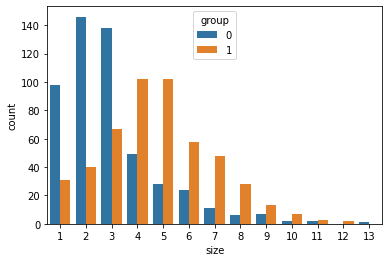

In [65]:
sns.countplot(data = order_per_user, x = 'size', hue = 'group')

На графике видно распределение заказов в двух группах.<br>
В контрольной (0) группе распределение больше в сторону меньшего числа заказов, а в тестовой группе (1) в сторону большего числа заказов.

In [66]:
pg.ttest(x = order_per_user.query('group == 0')['size'], y = order_per_user.query('group == 1')['size'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-13.97417,989.822835,two-sided,1.237410e-40,"[-2.02, -1.52]",0.879358,1.801e+37,1.0


Статистически значимые различия примерно в 2 заказа на пользователя.<br>
Пользователи из тестовой группы стали делать на 2 заказа больше.

<div class="alert alert-block alert-danger">
2 гипотеза - изменилась пропорция отмен заказов


In [67]:
#  Таблица отмен заказов в каждой группе, для сравнения посмотрим и количество заказов
pd.crosstab(users.group, users.is_canceled)

is_canceled,0,1
group,,
0,1527,164
1,2382,264


In [68]:
# Отмен заказов достаточно много, поэтому они могут повлиять на итоговый результат.
# Посчитаю, насколько это будет статистически значимо
exp, obs, stats = pg.chi2_independence(data = users, x = 'group', y = 'is_canceled')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.061601,1.0,0.803983,0.003769,0.057086
1,cressie-read,0.666667,0.061633,1.0,0.803933,0.003770,0.057090
2,log-likelihood,0.000000,0.061697,1.0,0.803834,0.003772,0.057097
3,freeman-tukey,-0.500000,0.061745,1.0,0.803759,0.003773,0.057103
4,mod-log-likelihood,-1.000000,0.061794,1.0,0.803683,0.003775,0.057109
5,neyman,-2.000000,0.061892,1.0,0.803530,0.003778,0.057120


P-value ощутимо больше 0,05  и маленькое значение cramer.<br>
Пропорция отмен не изменилась. Увеличилось число заказов и увеличилось число отмен.

<div class="alert alert-block alert-danger">
3 гипотеза - изменилось число продуктов в заказе.
</div>

In [69]:
# Объединяю данные в общую таблицу со всеми активными заказами и товарами
full_orders = orders.merge(active_ords, on = "order_id")
full_orders.head()

,order_id,creation_time,product_ids,user_id,action,time,date,group,is_canceled
0,1255,2022-08-26 00:00:19.000000,"{75, 22, 53, 84}",964,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,0
1,1256,2022-08-26 00:02:21.000000,"{56, 76, 39}",965,create_order,2022-08-26 00:02:21.000000,2022-08-26,1,0
2,1257,2022-08-26 00:02:27.000000,"{76, 34, 41, 38}",964,create_order,2022-08-26 00:02:27.000000,2022-08-26,0,0
3,1259,2022-08-26 00:03:37.000000,"{20, 45, 67, 26}",967,create_order,2022-08-26 00:03:37.000000,2022-08-26,1,0
4,1261,2022-08-26 00:05:35.000000,"{30, 35, 69, 6}",968,create_order,2022-08-26 00:05:35.000000,2022-08-26,0,0


In [70]:
full_orders['product_ids'] = full_orders['product_ids'].apply(lambda x: x.replace('{', '').replace('}', '').split(','))
full_orders.head()

,order_id,creation_time,product_ids,user_id,action,time,date,group,is_canceled
0,1255,2022-08-26 00:00:19.000000,"[75, 22, 53, 84]",964,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,0
1,1256,2022-08-26 00:02:21.000000,"[56, 76, 39]",965,create_order,2022-08-26 00:02:21.000000,2022-08-26,1,0
2,1257,2022-08-26 00:02:27.000000,"[76, 34, 41, 38]",964,create_order,2022-08-26 00:02:27.000000,2022-08-26,0,0
3,1259,2022-08-26 00:03:37.000000,"[20, 45, 67, 26]",967,create_order,2022-08-26 00:03:37.000000,2022-08-26,1,0
4,1261,2022-08-26 00:05:35.000000,"[30, 35, 69, 6]",968,create_order,2022-08-26 00:05:35.000000,2022-08-26,0,0


In [71]:
full_orders = full_orders.explode('product_ids')
full_orders.head()

,order_id,creation_time,product_ids,user_id,action,time,date,group,is_canceled
0,1255,2022-08-26 00:00:19.000000,75,964,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,0
0,1255,2022-08-26 00:00:19.000000,22,964,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,0
0,1255,2022-08-26 00:00:19.000000,53,964,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,0
0,1255,2022-08-26 00:00:19.000000,84,964,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,0
1,1256,2022-08-26 00:02:21.000000,56,965,create_order,2022-08-26 00:02:21.000000,2022-08-26,1,0


In [72]:
# Считаю сколько продуктов в заказах
items_per_order = full_orders.groupby(['group', 'order_id'], as_index = False).size()
items_per_order.head()

,group,order_id,size
0,0,1255,4
1,0,1257,4
2,0,1261,4
3,0,1262,4
4,0,1265,5


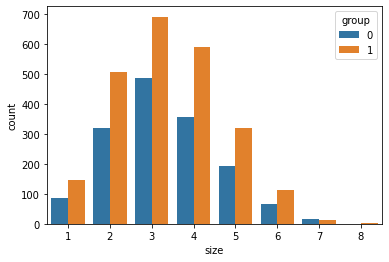

In [73]:
# График распределения количества товаров в заказах
sns.countplot(data = items_per_order, x = 'size', hue = 'group')

Распределение в обеих группах визуально не сильно отличается.<br>
Посмотрю с помощью t-testa, есть ли статистически значимое различие.

In [74]:
pg.ttest(x = items_per_order.query('group == 0')['size'], y = items_per_order.query('group == 1')['size'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.19686,3279.245189,two-sided,0.843949,"[-0.09, 0.07]",0.006438,0.038,0.054427


Статистически значимых различий в средних у нас нет.
Гипотеза не подтвердилась.

<div class="alert alert-block alert-danger">
4 гипотеза - изменилась стоимость заказа
</div>

In [75]:
full_orders.dtypes

order_id          int64
creation_time    object
product_ids      object
user_id           int64
action           object
time             object
date             object
group             int64
is_canceled       int64
dtype: object

In [76]:
full_orders['product_ids'] = full_orders['product_ids'].astype(int)
full_orders.dtypes

order_id          int64
creation_time    object
product_ids       int64
user_id           int64
action           object
time             object
date             object
group             int64
is_canceled       int64
dtype: object

In [77]:
# Вернусь к таблице всех заказов
full_orders = full_orders.rename(columns = {'product_ids': 'product_id'})
full_orders.head()

,order_id,creation_time,product_id,user_id,action,time,date,group,is_canceled
0,1255,2022-08-26 00:00:19.000000,75,964,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,0
0,1255,2022-08-26 00:00:19.000000,22,964,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,0
0,1255,2022-08-26 00:00:19.000000,53,964,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,0
0,1255,2022-08-26 00:00:19.000000,84,964,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,0
1,1256,2022-08-26 00:02:21.000000,56,965,create_order,2022-08-26 00:02:21.000000,2022-08-26,1,0


In [78]:
price_orders = full_orders.merge(products, on = 'product_id')
price_orders.head()

,order_id,creation_time,product_id,user_id,action,time,date,group,is_canceled,name,price
0,1255,2022-08-26 00:00:19.000000,75,964,create_order,2022-08-26 00:00:19.000000,2022-08-26,0,0,сок ананасовый,120.0
1,1287,2022-08-26 00:31:36.000000,75,987,create_order,2022-08-26 00:31:36.000000,2022-08-26,0,0,сок ананасовый,120.0
2,1403,2022-08-26 03:01:40.000000,75,1073,create_order,2022-08-26 03:01:40.000000,2022-08-26,1,0,сок ананасовый,120.0
3,1424,2022-08-26 04:01:22.000000,75,1089,create_order,2022-08-26 04:01:22.000000,2022-08-26,1,0,сок ананасовый,120.0
4,1495,2022-08-26 06:04:05.000000,75,1139,create_order,2022-08-26 06:04:05.000000,2022-08-26,1,0,сок ананасовый,120.0


In [79]:
# Какова выручка при использовании обоих алгоритмов. Есть ли разница?
sum_price_group = price_orders.groupby(['group', 'order_id'], as_index = False).price.sum()
sum_price_group.head()

,group,order_id,price
0,0,1255,408.7
1,0,1257,310.2
2,0,1261,430.7
3,0,1262,358.6
4,0,1265,546.4


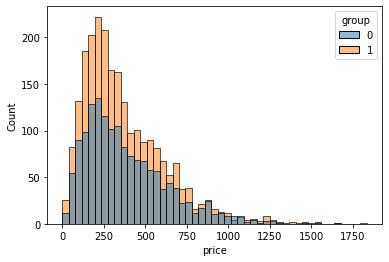

In [80]:
# Все будет наглядно видно на графике
sns.histplot(data = sum_price_group, x = "price", hue = "group")

In [81]:
# Сравню средние стоимости чека для обеих групп.
sum_price_group.groupby('group').agg({'price': 'mean'})

,price
group,
0,382.092927
1,368.861629


In [82]:
# Какого-то выделенного различия в среднем чеке не наблюдается. Сравним с помощью t-теста.

In [83]:
pg.ttest(x = sum_price_group.query('group == 0')['price'], y = sum_price_group.query('group == 1')['price'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.631329,3238.536101,two-sided,0.102918,"[-2.67, 29.13]",0.05355,0.139,0.372043


In [84]:
# Статистически значимого различия между средними стоимости заказов нет

<b>ВЫВОД:</b><br>
Рассмотренные 4 гипотезы подтвердили, что тестовая группа в 2 раза чаще делает заказы, при сохранении числа продуктов в заказе, среднего чека и числа отмен. Это значит, что выручка от использования новой системы рекомендации товаров выросла. Новый алгоритм стоит использовать и дальше.